In [4]:
%cd /data/xwt/Watermark/StegaStamp
!env CUDA_VISIBLE_DEVICES='0' \
/data/xwt/miniconda3/envs/legacy_tf_torch/bin/python encode_image.py \
  saved_models/stegastamp_pretrained \
  --image test_img.jpg  \
  --save_dir out \
  --secret THUSIGS 2>/dev/null && echo 'Encode watermark success.'

/data/xwt/Watermark/StegaStamp
L1 metric of residual=0.4996
Encode watermark success.


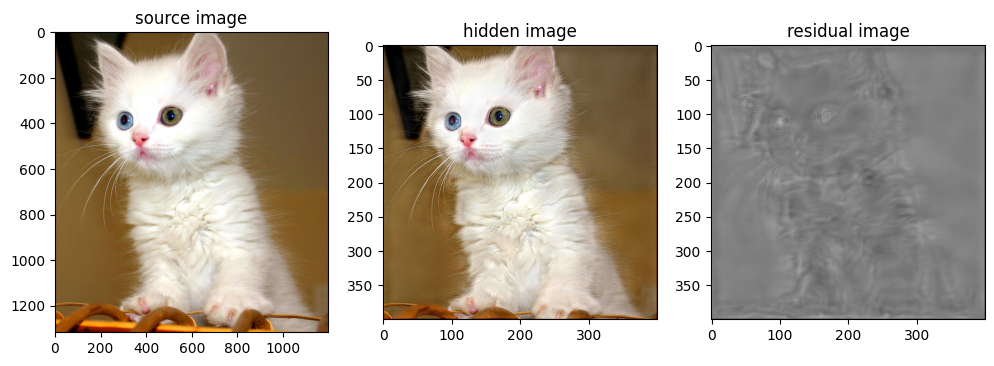

In [7]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_result(filename, hidden_img, residual_img):
    # show these three img encoded
    # sess.run(tf.global_variables_initializer())
    
    fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
    
    ax = fig.add_subplot(131)
    ax.set_title('source image')
    src_img = mpimg.imread(filename)
    ax.imshow(src_img)
    
    ax = fig.add_subplot(132)
    ax.set_title('hidden image')
    hid_img = mpimg.imread(hidden_img)
    ax.imshow(hid_img)
    
    ax = fig.add_subplot(133)
    ax.set_title('residual image')
    res_img = mpimg.imread(residual_img)
    ax.imshow(res_img)

    
filename, hidden_img, residual_img = [
    'test_img.jpg', 'out/test_img_hidden.png',
    'out/test_img_residual.png']
show_result(filename, hidden_img, residual_img)

In [25]:
!/data/xwt/miniconda3/envs/legacy_tf_torch/bin/python decode_image.py \
  saved_models/stegastamp_pretrained \
  --image out/test_img_hidden.png 2>/dev/null

out/test_img_hidden.png THUSIGS


/data/xwt/Watermark/StegaStamp


/data/xwt/miniconda3/envs/legacy_tf_torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/xwt/miniconda3/envs/legacy_tf_torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/xwt/miniconda3/envs/legacy_tf_torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/xwt/miniconda3/envs

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from detector_models/stegastamp_detector/variables/variables
INFO:tensorflow:Restoring parameters from saved_models/stegastamp_pretrained/variables/variables
Successful decode a secret


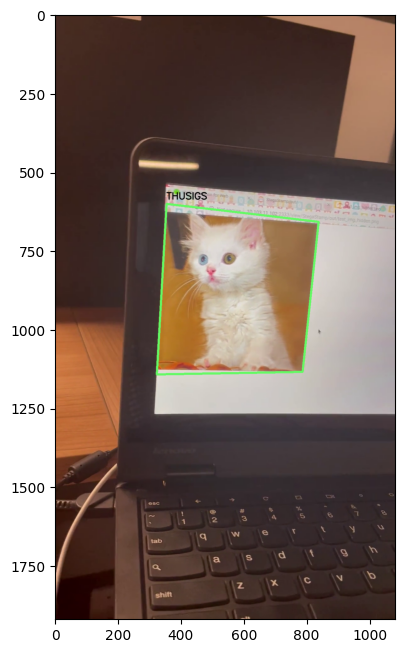

Successful decode a secret


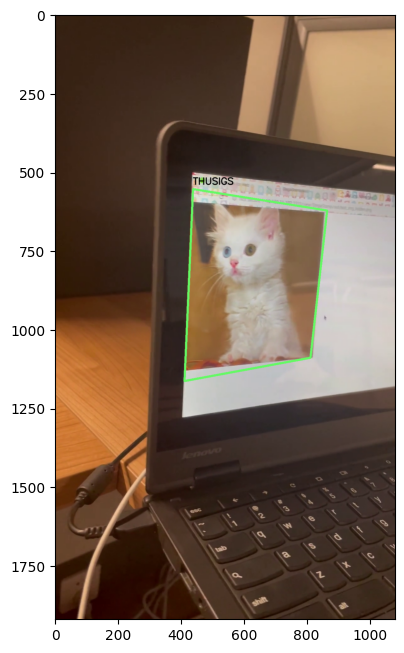

Successful decode a secret


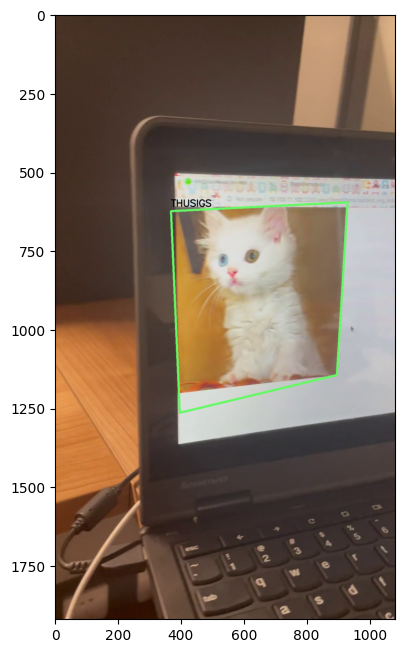

Successful decode a secret


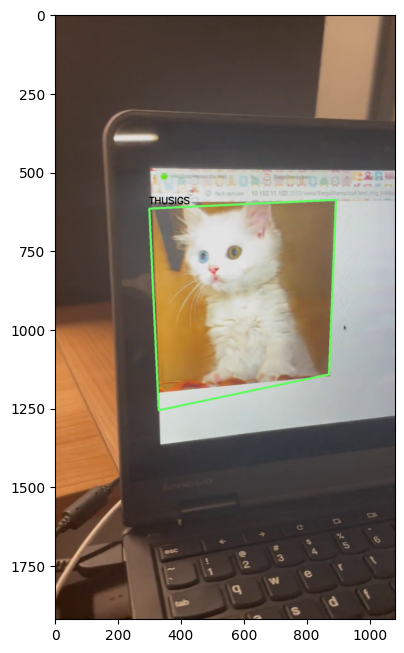

Successful decode a secret


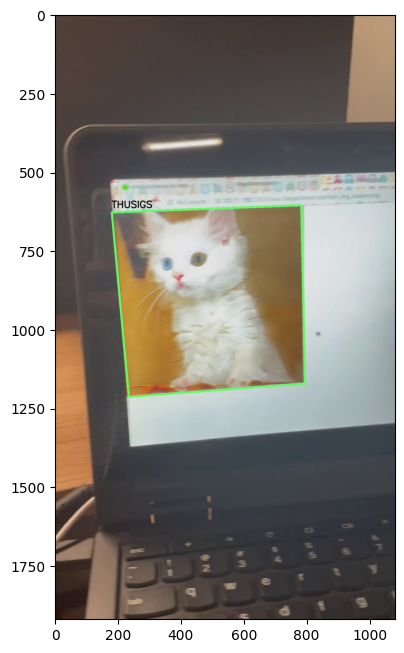

Successful decode a secret


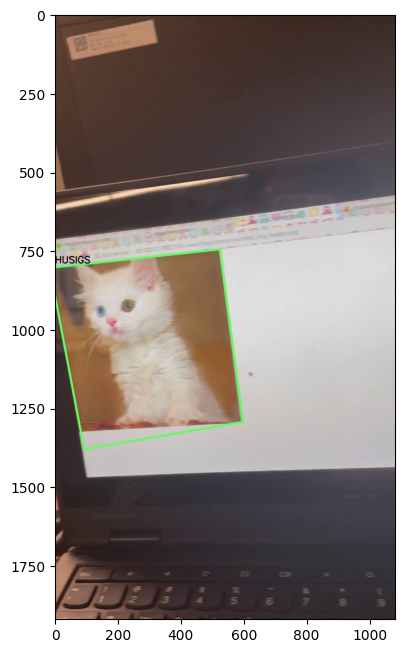

Successful decode a secret


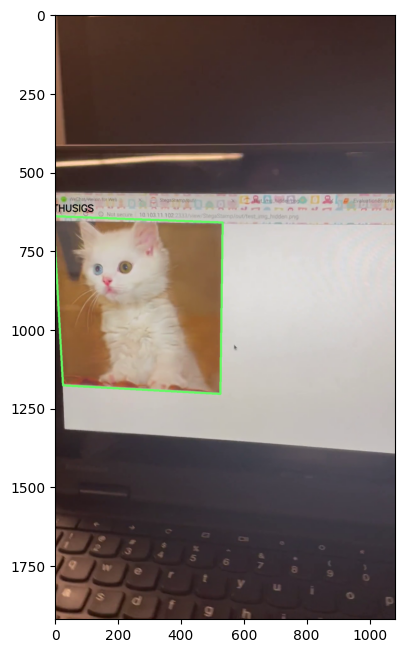

Successful decode a secret


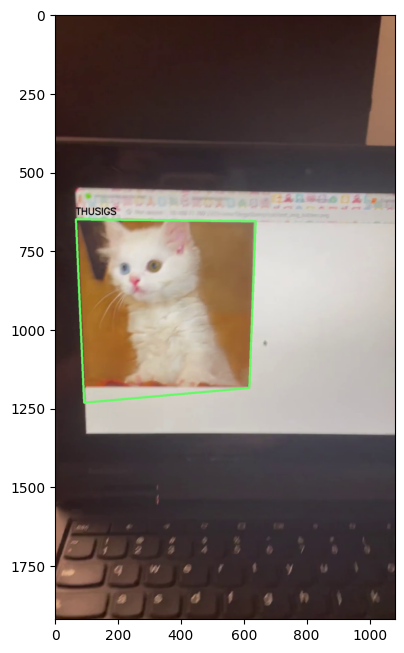

In [10]:
%cd /data/xwt/Watermark/StegaStamp
%matplotlib inline
from detector import main
from matplotlib import pyplot as plt

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self


args = AttrDict({
    'detector_model': 'detector_models/stegastamp_detector',
    'decoder_model': 'saved_models/stegastamp_pretrained',
    'video': 'test_vid.mp4',
    'save_video': None,
    'visualize_detector': False,
})
main(args, plt)
plt.show()

In [11]:
%cd /data/xwt/Watermark/StegaStamp
%matplotlib inline
from detector import main
from matplotlib import pyplot as plt

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self


args = AttrDict({
    'detector_model': 'detector_models/stegastamp_detector',
    'decoder_model': 'saved_models/stegastamp_pretrained',
    'video': 'test_vid.mp4',
    'save_video': 'test_vid_detected.mp4',
    'visualize_detector': False,
})
main(args, plt)
plt.show()

/data/xwt/Watermark/StegaStamp
INFO:tensorflow:Restoring parameters from detector_models/stegastamp_detector/variables/variables
INFO:tensorflow:Restoring parameters from saved_models/stegastamp_pretrained/variables/variables
Successful decode a secret
Successful decode a secret
Successful decode a secret
Successful decode a secret
Successful decode a secret
Successful decode a secret
Successful decode a secret
Successful decode a secret


## 对比方法

`TODO`:

* 二维码作为水印 (Universal-Deep-Hiding/main_lfm.py:L585)
* 测试加上水印后的照片在不同模拟噪声环境下的提取水印效果（缩小放大，椒盐噪声，etc.）
* 测试加上水印后的照片在真实相机拍摄(Light Field Messaging)下的提取水印效果

Methods:

* Universal-Deep-Hiding (scripts/test_lfm.sh, main_lfm.py)
* DWT-SVD (DWT-SVD_NEW.ipynb)
* SSSWatermark (test.py)

课题要求（cf. 指导书）及解决方案：

* 实现信息的编解码: 采用 StegaStamp 使用的 BCH 或者 UDH 中使用的二维码
* 水印嵌入: 使用深度隐写术（时域水印），同时对比频域水印（DWT-SVD，SSSW）
* 图像矫正复原：
* 水印提取：采用深度学习模型

衡量指标：

* 水印信息容量：StegaStamp 是 56bit，UDH 可以到 1024 bit
* 水印的不可见性：APD 或者采用 cover 与 container 的 L2 距离

In [8]:
%cd /data/xwt/Watermark/Universal-Deep-Hiding
!/data/xwt/miniconda3/envs/torch/bin/python main_lfm.py \
  --imageSize 128 \
  --bs_secret 2 \
  --num_training 1 \
  --num_secret 1 \
  --num_cover 1 \
  --channel_cover 3 \
  --channel_secret 3 \
  --norm 'batch' \
  --loss 'l2' \
  --beta 0.75 \
  --remark 'main_lfm' \
  --test 'main_watermarking' \
  --without_warp_noise \
  --secret 'THUSIGS'

/data/xwt/Watermark/Universal-Deep-Hiding
Namespace(Hnet='', Rnet='', beta=0.75, beta1=0.5, bs_secret=2, channel_cover=3, channel_secret=3, checkpoint='', checkpoint_diff='', cover_dependent=False, cuda=True, dataset='train', debug=False, decay_round=10, epochs=65, hostname='amax', imageSize=128, iters_per_epoch=2000, logFrequency=10, loss='l2', lr=0.001, ngpu=4, no_cover=False, noise_cover=False, norm='batch', num_cover=1, num_secret=1, num_training=1, outckpts='./training/', outcodes='./training/', outlogs='./training/main_watermarking/testLogs', plain_cover=False, remark='main_lfm', resultPicFrequency=100, secret='THUSIGS', test='main_watermarking', testPics='./training/main_watermarking/testPics', test_diff='', trainpics='./training/', validationpics='./training/main_watermarking/testPics', without_std_noise=False, without_warp_noise=True, workers=8)
DataParallel(
  (module): UnetGenerator(
    (model): UnetSkipConnectionBlock(
      (model): Sequential(
        (0): Conv2d(3, 64, 

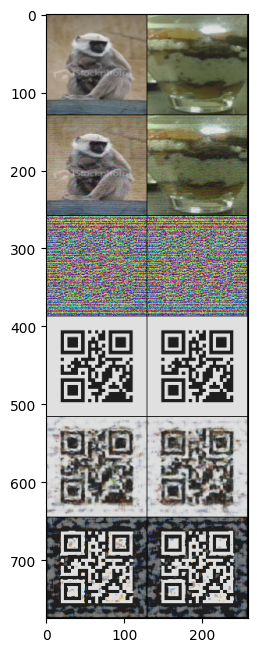

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(mpimg.imread('/data/xwt/Watermark/Universal-Deep-Hiding/training/main_watermarking/testPics/' +
                        'ResultPicsLFM_epoch000_batch0001.png'))
plt.show()